In [ ]:
import pandas as pd
import sqlite3 as sql

In [ ]:
engine = sql.connect('temp1000.db')
cursor= engine.cursor() 

In [ ]:
url = "https://raw.github.com/pandas-dev/pandas/master/pandas/tests/io/data/csv/tips.csv"
tips = pd.read_csv(url)

In [ ]:
tips.to_sql('tipsDB', con=engine)

In [ ]:
cursor.execute('select * from tipsDB LIMIT 5').fetchall()

In [ ]:
tips.head()

In [ ]:
tips.columns

In [ ]:
cursor.execute('PRAGMA table_info(tipsDB)').fetchall()

In [ ]:
tips.info()

In [ ]:
tips.smoker.map(type)

In [ ]:
sql_select = 'SELECT total_bill, tip, smoker, time\
              FROM tipsDB\
              LIMIT 5'
cursor.execute(sql_select).fetchall()

In [ ]:
tips[['total_bill','tip','smoker','time']].head()

In [ ]:
sql_select = 'SELECT *, tip/total_bill as tip_rate\
                FROM tipsDB\
                LIMIT 5'
cursor.execute(sql_select)
cl_names = []
for x in cursor.description: 
    cl_names.append(x[0])


print(cl_names)
for row in cursor.fetchall():
    print(row)


In [ ]:
tips.assign(tip_rate=tips["tip"] / tips["total_bill"]).head(5)

In [ ]:
### WHERE ####3
sql_filter = 'SELECT * FROM tipsDB WHERE time = "Dinner" LIMIT 5'
cursor.execute(sql_filter).fetchall()

In [ ]:
tips[tips['time']=='Dinner'].head()

In [ ]:
sql_select_3 = 'SELECT * FROM tipsDB WHERE time = "Dinner" AND tip > 5.00'
cursor.execute(sql_select_3).fetchall()

In [ ]:
tips[(tips['time'] == 'Dinner') & (tips['tip'] > 5.00)].head()

In [ ]:
sql_update = 'update tipsDB set tip=NULL where tip=7.58'
cursor.execute(sql_update)
engine.commit()

In [ ]:
cursor.execute('select * from tipsDB where total_bill=39.42').fetchall()

In [ ]:
sql_isnull = 'SELECT * FROM tipsDB WHERE tip IS NULL'
cursor.execute(sql_isnull).fetchall()

In [ ]:
#import numpy as np
tips[tips['tip'].isna()]

tips.loc[tips['tip']<3.0,'tip']=None


In [ ]:
tips[tips['tip'].isna()]

In [ ]:
sql_isnotnull = 'SELECT * FROM tipsDB WHERE total_bill IS NOT NULL'
cursor.execute(sql_isnotnull).fetchall()

In [ ]:
tips[tips["total_bill"].notna()]

In [ ]:
### GROUP BY ###
sql_groupby = 'SELECT sex, count(*) FROM tipsDB GROUP BY sex'
cursor.execute(sql_groupby).fetchall()


In [ ]:
tips.groupby('sex').size()

In [ ]:
sql = 'SELECT smoker, day, COUNT(*), AVG(tip) FROM tipsDB GROUP BY smoker, day'
cursor.execute(sql).fetchall()

In [ ]:
tips.groupby(["smoker", "day"]).agg({"tip": ['count', 'mean']})

In [ ]:
db_Airbnb = pd.read_csv('listings-2.csv')

df1 = db_Airbnb[['bedrooms','accommodates','price']]


df2 = df1.assign(price=df1['price'].str.replace('$', ''))
df3 = df2.assign(price=df2['price'].str.replace(',', '').astype(float))

df3.groupby(["bedrooms"]).mean()
df3.groupby(["bedrooms"]).agg({"price":['mean']})

#db_filtered.groupby(["bedrooms"]).agg({"price":['mean']})

In [ ]:
df1["accommodates"].isnull().sum()


In [ ]:
df3[["price","accommodates"]].corr()

In [ ]:
import numpy as np
values = np.random.randn(4)
values = np.append(values,np.nan)

df1 = pd.DataFrame({"key": ["A", "B", "C", "D","E"], "value": values})
df2 = pd.DataFrame({"key": ["B", "D", "D", "E"], "value": np.random.randn(4)})


df1.to_sql('df1DB', con=engine)
df2.to_sql('df2DB', con=engine)

In [ ]:
sql_join = 'SELECT * FROM df1DB INNER JOIN df2DB ON df1DB.key = df2DB.key'
cursor.execute(sql_join).fetchall()

In [ ]:
pd.merge(df1, df2, on="key")

In [ ]:
sql_leftjoin = 'SELECT * FROM df1DB LEFT OUTER JOIN df2DB ON df1DB.key = df2DB.key'
cursor.execute(sql_leftjoin).fetchall()

In [ ]:
pd.merge(df1, df2, on="key", how="left")

In [ ]:
df3 = pd.DataFrame( 
        {"city": ["Chicago", "San Francisco", "New York City"], "rank": range(1, 4)}
        )

df4 = pd.DataFrame(
        {"city": ["Chicago", "Boston", "Los Angeles"], "rank": [1, 4, 5]})


In [ ]:
df3.to_sql('df3DB', con=engine)
df4.to_sql('df4DB', con=engine)

In [ ]:
sql_union = 'SELECT *\
                FROM df3DB\
                UNION ALL\
             SELECT *\
                FROM df4DB'
cursor.execute(sql_union).fetchall()

In [ ]:
header_list = ["personid", "firstname", "middleinitial","lastname","dateofbirth"]
path_file = "/Users/charles/Documents/Infnet/Semana4/Sample/SamplePersonData"
df_Person = pd.read_csv(path_file, names=header_list)
df_Person

In [ ]:
header_list = ["studentid", "personid", "email"]
path_file = "/Users/charles/Documents/Infnet/Semana4/Sample/SampleStudentData"
df_Student = pd.read_csv(path_file, names=header_list)
df_Student                         

In [ ]:
header_list = ["courseid", "name", "teacher"]
path_file = "/Users/charles/Documents/Infnet/Semana4/Sample/SampleCourseData"
df_Course = pd.read_csv(path_file, names=header_list)
df_Course

In [ ]:
header_list = ["studentid", "courseid", "grade","attempt"]
path_file = "/Users/charles/Documents/Infnet/Semana4/Sample/SampleCreditData"
df_Credit = pd.read_csv(path_file, names=header_list)
df_Credit

In [ ]:
df_Credit.groupby(df_Credit.grade > 83.5).size()

In [ ]:
df_Course.name.sort_values(ascending=True)

In [ ]:
df_Person[df_Person.lastname.str.contains("ez")]

In [ ]:
df_n = df_Credit[['studentid','grade']]

In [ ]:
df_n.assign(status= lambda x: np.where(x["grade"] > 70.0, "Aprovado", "Reprovado"))

#lambda x: np.where(x["grade"] > 70.0, "Apr", "Repr")

In [ ]:
conditions = "courseid"
df_m = pd.merge(df_Credit,df_Course,on=conditions)

In [ ]:
#df_nameCourse = df_m[df_m.grade.mean() > 70.0]
df_m.grade.mean()

In [ ]:
## Realizar uma consulta que retorne os email dos alunos que cursaram 3 vezes um mesmo curso  

df_res = pd.merge(df_Student,df_Credit,on="studentid")

In [ ]:
df_res1 = df_res[df_res["attempt"] == 3]

In [ ]:
df_res1.email

In [ ]:
## DESAFIO) Realizar uma consulta que retorne os nomes dos professores mais carrascos - isto é - aqueles cujo o número de alunos reprovados (média menor que 70.0) foi maior do que de
## alunos aprovados.

df_ = pd.merge(df_Course, df_Credit,on="courseid")

In [ ]:
df_

In [ ]:
df__ = df_.assign(status= lambda x: np.where(x["grade"] > 70.0, "Aprovado", "Reprovado"))
df__

In [ ]:
df_f = df__.groupby(["teacher","status"]).size()

In [ ]:
df_f.head()

In [ ]:
df_4 = df_f.reset_index(name = "Total")
df_4.groupby(['teacher']).agg({'Total': ['max']})

In [ ]:

lst_index  = (df_4.loc[range(0,len(df_4),2),'Total']) 
lst_index2  = (df_4.loc[range(1,len(df_4),2),'Total']) 

idx=[]

for i in range(len(lst_index)):
        if lst_index.values[i] < lst_index2.values[i]: 
            idx.append(lst_index2.index[i])
        else: 
            idx.append(lst_index.index[i])
        
df_4.values[idx]

In [ ]:
df_4.groupby(['teacher']).max()

In [ ]:
####  Achar os estudantes do prof. Harley Albert que obtiveram média > 70.0 
### A consulta deverá retornar os seguintes atributos: FirstName, LastName, Course(Name), Média (Grade)  
df_merge_Course_Credit = pd.merge(df_Course,df_Credit,on='courseid')


In [ ]:
df_Course_Credit_prof_H = df_merge_prof.loc[df_merge_Course_Credit.courseid==30]

In [ ]:
df_Course_Credit_Stud_profH = pd.merge(df_Course_Credit_prof_H,df_Student,on='studentid')

In [ ]:
df_Student_Course_Credit_Stud_profH = pd.merge(df_Person,df_Course_Credit_Stud_profH,on='personid')

In [ ]:
df_studentnames_of_result = df_Student_Course_Credit_Stud_profH.loc[(df_Student_Course_Credit_Stud_profH.grade > 70.0)]


In [ ]:
df_studentnames_of_result_ =df_studentnames_of_result[['firstname','lastname','name','grade']]

In [ ]:
df_studentnames_of_result_

In [1]:
import pandas as pd
#dfClean = pd.read_csv('dirtydata_Semana5.csv')
dfClean = pd.read_csv('data.csv')
dfClean

,Duration,Pulse,Maxpulse,Calories
0,60,110,130,409.1
1,60,117,145,479.0
2,60,103,135,340.0
3,45,109,175,282.4
4,45,117,148,406.0
...,...,...,...,...
164,60,105,140,290.8
165,60,110,145,300.0
166,60,115,145,310.2
167,75,120,150,320.4


In [2]:
#dfClean['Date'].str.match("'[0-9]{4}/[0-9]{2}/[0-9]{2}'")

In [3]:
#### Verifica se tem duplicatas no Dataframe ###3
dfClean[dfClean.duplicated()]

,Duration,Pulse,Maxpulse,Calories
36,60,102,127,300.0
37,60,100,120,300.0
38,60,100,120,300.0
40,45,90,112,180.1
71,60,109,153,387.6
113,45,100,120,225.3
155,60,111,151,368.5


In [4]:
### Remove as duplicatas ####
dfClean.drop_duplicates(inplace=True)
dfClean.head(50)

,Duration,Pulse,Maxpulse,Calories
0,60,110,130,409.1
1,60,117,145,479.0
2,60,103,135,340.0
3,45,109,175,282.4
4,45,117,148,406.0
5,60,102,127,300.0
6,60,110,136,374.0
7,45,104,134,253.3
8,30,109,133,195.1
9,60,98,124,269.0


In [5]:
### Reset_index #### 
dfClean.reset_index(drop=True,inplace=True)
dfClean.head(50)

,Duration,Pulse,Maxpulse,Calories
0,60,110,130,409.1
1,60,117,145,479.0
2,60,103,135,340.0
3,45,109,175,282.4
4,45,117,148,406.0
5,60,102,127,300.0
6,60,110,136,374.0
7,45,104,134,253.3
8,30,109,133,195.1
9,60,98,124,269.0


In [6]:
### Verifica se tem valores nulos na tabela ###
dfClean.isnull().sum()

Duration    0
Pulse       0
Maxpulse    0
Calories    5
dtype: int64

In [7]:
dfClean.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162 entries, 0 to 161
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Duration  162 non-null    int64  
 1   Pulse     162 non-null    int64  
 2   Maxpulse  162 non-null    int64  
 3   Calories  157 non-null    float64
dtypes: float64(1), int64(3)
memory usage: 5.2 KB


In [8]:
### Tipos de uma coluna #### 
dfClean.Calories.map(type)

0      <class 'float'>
1      <class 'float'>
2      <class 'float'>
3      <class 'float'>
4      <class 'float'>
            ...       
157    <class 'float'>
158    <class 'float'>
159    <class 'float'>
160    <class 'float'>
161    <class 'float'>
Name: Calories, Length: 162, dtype: object

In [9]:
### Visualiza a coluna Calories #####
dfClean[dfClean.Calories.isna()]

,Duration,Pulse,Maxpulse,Calories
17,45,90,112,NaN
27,60,103,132,NaN
86,45,107,137,NaN
112,60,105,125,NaN
135,60,97,127,NaN


In [10]:
#### Substituir pela média ##### 
avg_45 = dfClean[dfClean.Duration==45].Calories.mean()
avg_45

277.7870967741935

In [11]:
avg_60 = dfClean[dfClean.Duration==60].Calories.mean()
avg_60

340.2704225352114

In [12]:
dfClean.loc[(dfClean.Calories.isna()) & (dfClean.Duration==60),'Calories'] = avg_60

In [13]:
dfClean.loc[(dfClean.Calories.isna()) & (dfClean.Duration==45),'Calories'] = avg_45

In [14]:
dfClean[dfClean.Calories.isnull()]

,Duration,Pulse,Maxpulse,Calories


In [15]:
## Visualização do DataFrame ###### 
dfClean.Calories.plot

<AxesSubplot:xlabel='Duration', ylabel='Calories'>

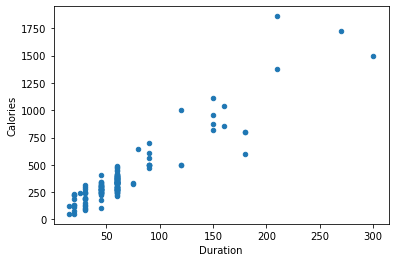

In [16]:
dfClean.plot(kind='scatter', x='Duration', y='Calories')

### Regressão Linear #####

#### Coeficiente de Determinação (R-squared) : 

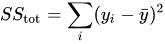
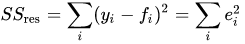
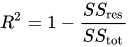

#### Mean squared error :

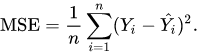

 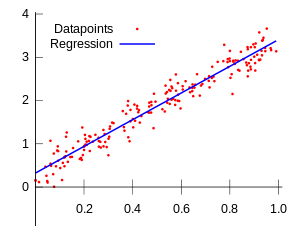

<AxesSubplot:>

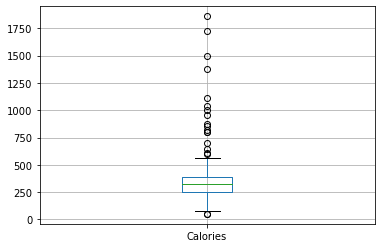

In [23]:
dfClean.boxplot('Calories')

In [19]:
dfClean.describe()

,Duration,Pulse,Maxpulse,Calories
count,162.000000,162.000000,162.000000,162.000000
mean,64.197531,107.709877,134.265432,377.435095
std,43.151882,14.711588,16.471618,267.381894
min,15.000000,80.000000,100.000000,50.300000
25%,45.000000,100.000000,124.000000,255.075000
50%,60.000000,105.500000,131.000000,320.700000
75%,60.000000,111.000000,141.000000,386.700000
max,300.000000,159.000000,184.000000,1860.400000


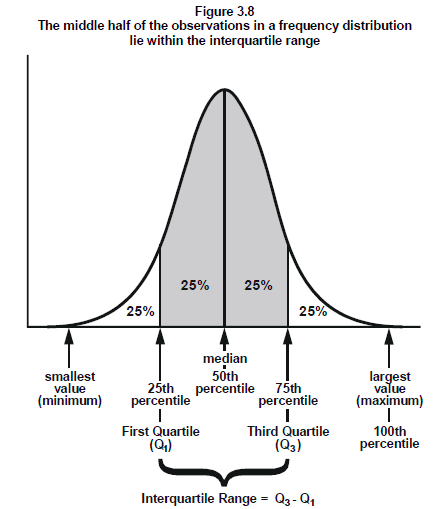

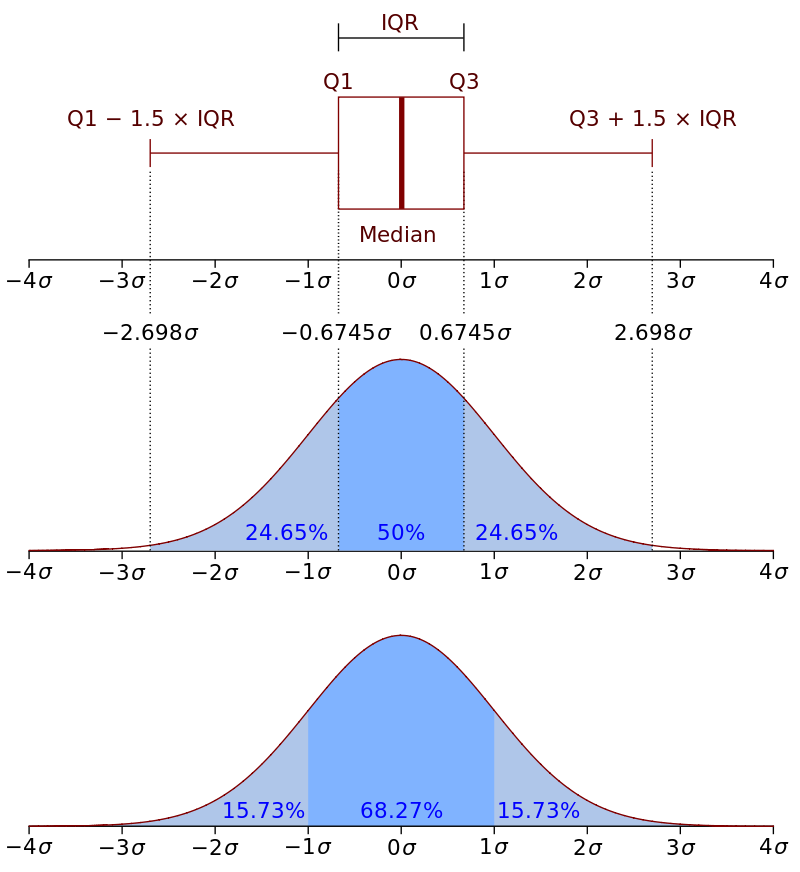


In [20]:
dfClean.corr()

,Duration,Pulse,Maxpulse,Calories
Duration,1.000000,-0.162098,0.003578,0.923190
Pulse,-0.162098,1.000000,0.787035,0.019258
Maxpulse,0.003578,0.787035,1.000000,0.197465
Calories,0.923190,0.019258,0.197465,1.000000


In [21]:
### P-Values
from scipy import stats
pearson_coef, p_value = stats.pearsonr(dfClean['Duration'], dfClean['Calories'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value) 

The Pearson Correlation Coefficient is 0.9231899432094213  with a P-value of P = 2.447193062824461e-68


<AxesSubplot:xlabel='Duration', ylabel='Calories'>

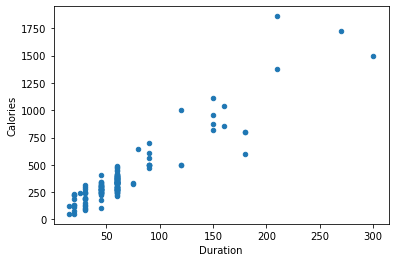

In [22]:
#### Visualizar Duration x Calories 
dfClean.plot(kind='scatter', x='Duration', y='Calories')

In [24]:
from sklearn.linear_model import LinearRegression

In [25]:
lr = LinearRegression()
lr

LinearRegression()

In [26]:
### Definir as Variáveis X e Y 
X = dfClean[['Duration']]
Y = dfClean[['Calories']]

In [27]:
### Acha a reta que melhor descreve a distribuição dos dados 
lr.fit(X,Y)

LinearRegression()

$$
Yhat = a + b  X
$$

In [28]:
a = lr.intercept_
print(a)

[10.20214808]


In [29]:
b= lr.coef_
print(b)

[[5.72035937]]


In [30]:
### Usa o modelo para predição #### 
Yhat = lr.predict(X)
Yhat[0:5]

array([[353.42371042],
       [353.42371042],
       [353.42371042],
       [267.61831984],
       [267.61831984]])

In [121]:
dfClean.head()

,Duration,Pulse,Maxpulse,Calories
0,60,110,130,409.1
1,60,117,145,479.0
2,60,103,135,340.0
3,45,109,175,282.4
4,45,117,148,406.0


In [122]:
### R-squared #####
print('The R-square is: ', lr.score(X, Y))

The R-square is:  0.8522796712430143


In [31]:
#### MSE - Mean Squared Error #### 
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(dfClean['Calories'], Yhat)
print('The mean square error of Calories and predicted value is: ', mse)

The mean square error of Calories and predicted value is:  10495.789626824871


In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

<AxesSubplot:xlabel='Duration', ylabel='Calories'>

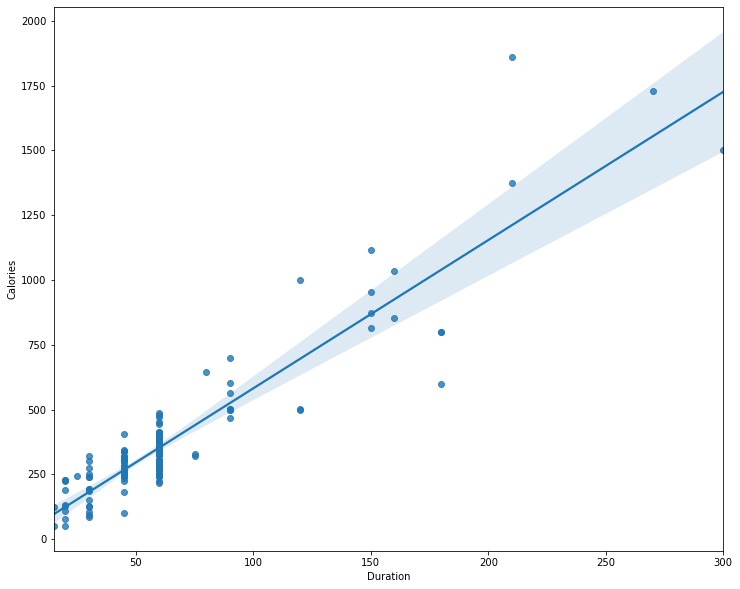

In [125]:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.regplot(x="Duration", y="Calories", data=dfClean)


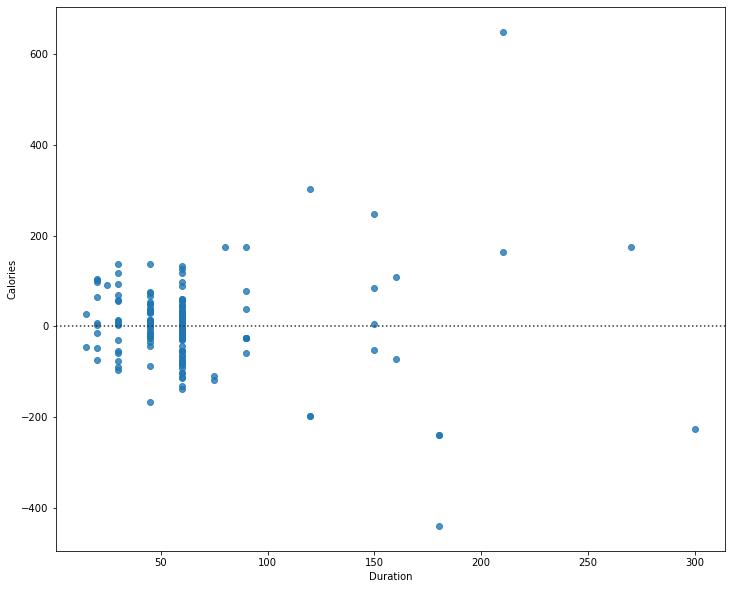

In [34]:
width = 12
height = 10
plt.figure(figsize=(width, height))
x =dfClean['Duration']
y = dfClean['Calories']
sns.residplot(x,y)
plt.show()

<h4>Multiple Linear Regression</h4>

$$
Y: Response \ Variable\\
X_1 :Predictor\ Variable \ 1\\
X_2: Predictor\ Variable \ 2\\
X_3: Predictor\ Variable \ 3\\
X_4: Predictor\ Variable \ 4\\
$$



$$
a: intercept\\
b_1 :coefficients \ of\ Variable \ 1\\
b_2: coefficients \ of\ Variable \ 2\\
b_3: coefficients \ of\ Variable \ 3\\
b_4: coefficients \ of\ Variable \ 4\\
$$

$$
Yhat = a + b_1 X_1 + b_2 X_2 + b_3 X_3 + b_4 X_4
$$

In [41]:
Xm = dfClean[['Duration','Maxpulse','Pulse']]
Y = dfClean[['Calories']]

In [42]:
lr.fit(Xm,Y)

LinearRegression()

In [43]:
Yhat = lr.predict(Xm)

In [44]:
### R-squared #####
print('The R-square is: ', lr.score(Xm, Y))

The R-square is:  0.8907014078940126


In [45]:
#### MSE - Mean Squared Error #### 
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(dfClean['Calories'], Yhat)
print('The mean square error of Calories and predicted value is: ', mse)

The mean square error of Calories and predicted value is:  7765.857542463226


<h4>Polynomial Regression</h4>

<center><b>Quadratic - 2nd order</b></center>
$$
Yhat = a + b_1 X +b_2 X^2 
$$

<center><b>Cubic - 3rd order</b></center>
$$
Yhat = a + b_1 X +b_2 X^2 +b_3 X^3\\\\
$$

<center><b>Higher order</b>:</center>
$$
Y = a + b_1 X +b_2 X^2 +b_3 X^3 ....\\\\
$$

In [78]:
Xp = dfClean['Duration']
Y = dfClean['Calories']
Xp

0      60
1      60
2      60
3      45
4      45
       ..
157    60
158    60
159    60
160    75
161    75
Name: Duration, Length: 162, dtype: int64

In [106]:
# Here we use a polynomial of the 3rd order (cubic) 
import numpy as np
f = np.polyfit(Xp, Y, 1)
p = np.poly1d(f)
print(p)

 
5.72 x + 10.2


In [108]:
np.polyfit(Xp, Y, 1)

array([ 5.72035937, 10.20214808])

In [109]:
def PlotPolly(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(15, 300, 100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title('Polynomial Fit with Matplotlib for Calories ~ Duration')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Calories')

    plt.show()
    plt.close()

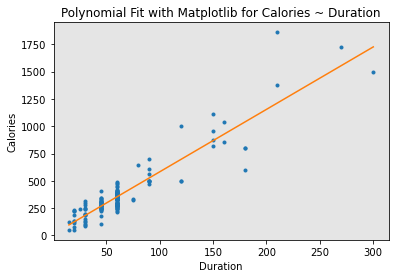

In [110]:
PlotPolly(p, Xp, Y, 'Duration')

In [111]:
from sklearn.metrics import r2_score

In [112]:
r_squared = r2_score(Y, p(Xp))
print('The R-square value is: ', r_squared)

The R-square value is:  0.8522796712430143


In [131]:
mean_squared_error(Y, p(Xp))

10495.789626824868

In [133]:
dfWeather = pd.read_csv('weatherHistory.csv')